In [3]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


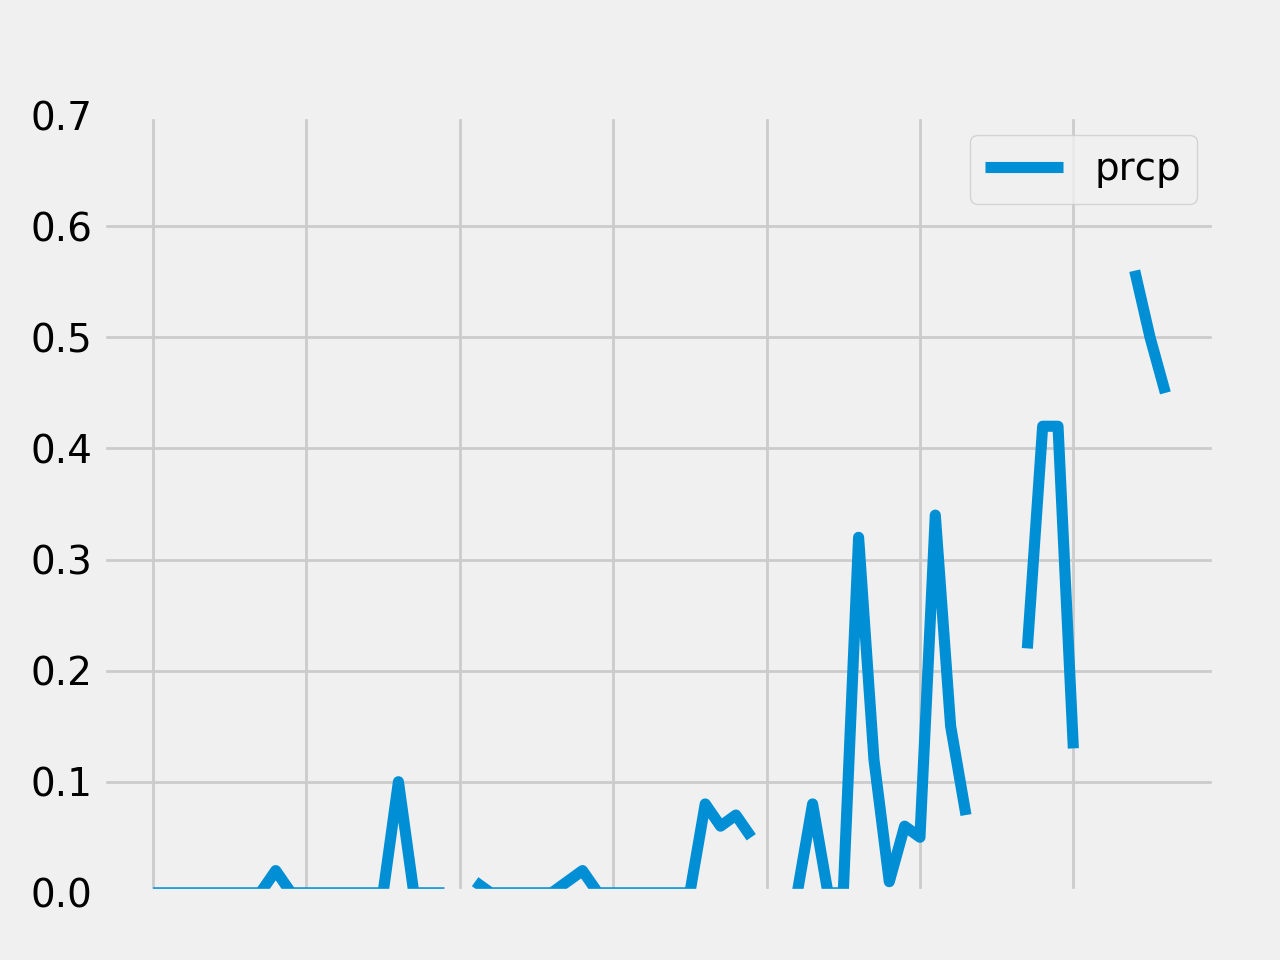

(0, 0.7)

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
one_year = session.query(Measurement).\
    filter(Measurement.date > '2016-08-23')
#for row in one_year:
    #print(row)
# Calculate the date 1 year ago from today
import datetime
a_year_ago = datetime.datetime.now() - datetime.timedelta(days=1*365)
# Perform a query to retrieve the data and precipitation scores
date = session.query(Measurement.date).filter(Measurement.date > a_year_ago)
date_list = []
for row in date:
    date_list.append(row)
prcp = session.query(Measurement.prcp).filter(Measurement.date > a_year_ago)
prcp_list = []
for row in prcp:
    prcp_list.append(row)
prcp_list
df_prcp = pd.DataFrame.from_records(prcp_list)
df = pd.DataFrame.from_records(prcp_list,date_list, columns= ['prcp'])
df2 = df.reset_index()
df2
# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
df2.sort_values(['index'], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.ylim(0,.7)
# Rotate the xticks for the dates

In [91]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_prcp.describe()

,0
count,60.000000
mean,0.075833
std,0.140680
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,0.560000


In [92]:
# How many stations are available in this dataset?
session.query(Station).count()

9

In [129]:
# What are the most active stations?
# List the stations and the counts in descending order.
station_date = session.query(Measurement.date)
station_date_list = []
for row in station_date:
    station_date_list.append(row)
station = session.query(Measurement.station)
station_list = []
for row in station:
    station_list.append(row)
df_station = pd.DataFrame.from_records(station_date_list,station_list, columns=['date'])
df_station2 = df_station.reset_index()
df_station2 = df_station2.groupby('index').count()
df_station2.sort_values(['date'], ascending=False) 

,date
index,
"(USC00519281,)",2772
"(USC00519397,)",2724
"(USC00513117,)",2709
"(USC00519523,)",2669
"(USC00516128,)",2612
"(USC00514830,)",2202
"(USC00511918,)",1979
"(USC00517948,)",1372
"(USC00518838,)",511


In [168]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
max_t = session.query(func.max(Measurement.tobs).label('max')).filter(Measurement.station =='USC00519281').first()
min_t = session.query(func.min(Measurement.tobs).label('min')).filter(Measurement.station =='USC00519281').first()
avg = session.query(func.avg(Measurement.tobs).label('average')).filter(Measurement.station =='USC00519281').first()
print(max_t,min_t,avg)

(85.0,) (54.0,) (71.66378066378067,)


In [192]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(Measurement.tobs)
station_tobs_list = []
for row in station_tobs:
    station_tobs_list.append(row)
station = session.query(Measurement.station)
station_list = []
for row in station:
    station_list.append(row)
df_station_tobs = pd.DataFrame.from_records(station_tobs_list,station_list, columns=['tobs'])
df_station_tobs2 = df_station_tobs.reset_index()
df_station_tobs3 = df_station_tobs2.groupby('index').count()
df_station_tobs3.sort_values(['tobs'], ascending=False) 

,tobs
index,
"(USC00519281,)",2772
"(USC00519397,)",2724
"(USC00513117,)",2709
"(USC00519523,)",2669
"(USC00516128,)",2612
"(USC00514830,)",2202
"(USC00511918,)",1979
"(USC00517948,)",1372
"(USC00518838,)",511


In [ ]:
session.query(Measurement.tobs.label('max')).filter(Measurement.station =='USC00519281').first()

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
